# cnn_simple

### Import libraries

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

### Create a simple example input image (28x28 grayscale)

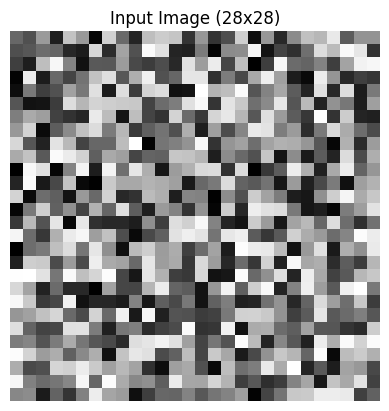

In [17]:
input_shape = (28, 28, 1)
example_input = np.random.rand(1, *input_shape).astype(np.float32)

# Afficher l'image
plt.imshow(example_input[0, :, :, 0], cmap='gray')
plt.title("Input Image (28x28)")
plt.axis('off')
plt.show()

### Build the CNN model with the 3 key steps


In [18]:
model = models.Sequential([
    # Convolution layer (pattern detection)
    layers.Conv2D(filters=3, kernel_size=(3, 3), activation='relu', input_shape=input_shape, name='Convolution'),

    # Pooling layer (reduce dimensionality)
    layers.MaxPooling2D(pool_size=(2, 2), name='Pooling'),

    # Flatten layer (reshape for dense layers)
    layers.Flatten(name='Flatten'),

    # Dense layer (for classification example)
    layers.Dense(10, activation='softmax', name='Output')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolution (Conv2D)            │ (None, 26, 26, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pooling (MaxPooling2D)          │ (None, 13, 13, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 507)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         5,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,110 (19.96 KB)

 Trainable params: 5,110 (19.96 KB)

 Non-trainable params: 0 (0.00 B)

### Run the example input through the model step by step to visualize

In [19]:
conv_layer = model.get_layer('Convolution')
pool_layer = model.get_layer('Pooling')
flatten_layer = model.get_layer('Flatten')

conv_output = conv_layer(example_input)
pool_output = pool_layer(conv_output)
flatten_output = flatten_layer(pool_output)

print(f"Convolution output shape: {conv_output.shape}")
print(f"Pooling output shape: {pool_output.shape}")
print(f"Flatten output shape: {flatten_output.shape}")

Convolution output shape: (1, 26, 26, 3)
Pooling output shape: (1, 13, 13, 3)
Flatten output shape: (1, 507)


### Plotting the first feature map after convolution

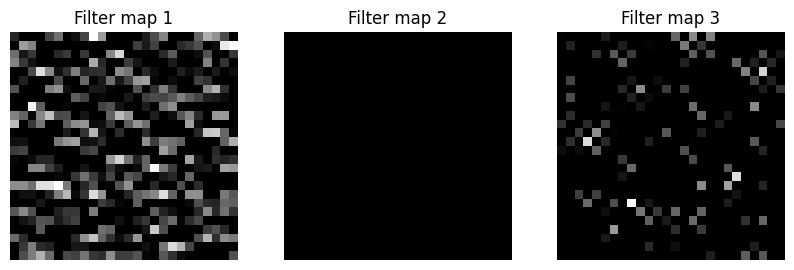

In [20]:
plt.figure(figsize=(10, 3))
for i in range(conv_output.shape[-1]):
    plt.subplot(1, conv_output.shape[-1], i + 1)
    plt.title(f'Filter map {i+1}')
    plt.imshow(conv_output[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()